# 1.. STATISTIQUES DESCRIPTIVES

In [5]:
# Data Management
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# home-made functions
import src.ad_hoc_functions as ahf

#options
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

# data import and management


## Import and check formats


In [3]:
data_math = pd.read_csv('student/student-mat.csv',sep=';')
data_math = data_math.rename(columns={"G1": "G1_math", "G2": "G2_math", "G3": "G3_math"})

data_port = pd.read_csv('student/student-por.csv',sep=';')
data_port = data_port.rename(columns={"G1": "G1_port", "G2": "G2_port", "G3": "G3_port"})

In [6]:
# Add information to dataset : apply function on Math students
data_math = ahf.add_info(data_math, 'math')

# apply function on Portugese students
data_port = ahf.add_info(data_port, 'port')

print("shape of data_math: {}".format(data_math.shape))
print("shape of data_port: {}".format(data_port.shape))

data_port.head()

shape of data_math: (395, 36)
shape of data_port: (649, 36)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1_port,G2_port,G3_port,Gmean_port,flag_port,pass_port
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,5.5,1,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,10.0,1,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,12.5,1,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,14.0,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,12.0,1,1


## Define Students with both a grade in Math and Portugese

##### The main goal of this preliminary stage is to define a correlation between math results and portugese results. If this correlation is established, we will focus on the portugese dataset, which is more consistent.

In [7]:
# Inner on both table to identify Students with both grades.
data_math_port = pd.merge(data_math,
                          data_port[['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet','pass_port','Gmean_port']],
                          left_on = ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet'],
                          right_on= ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet'],
                          how='inner',
                          suffixes=('', '_y')
                         )

# Remove duplicated columns
data_math_port.drop(data_math_port.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

# print info
print("shape of data: {}".format(data_math_port.shape))
data_math_port.head()

shape of data: (382, 38)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1_math,G2_math,G3_math,Gmean_math,flag_math,pass_math,pass_port,Gmean_port
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,5.5,1,0,1,5.5
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,5.0,1,0,1,10.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,7.5,1,1,1,12.5
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,14.5,1,1,1,14.0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,8.0,1,1,1,12.0


Text(0.5, 1.0, 'Heatmap of features correlations')

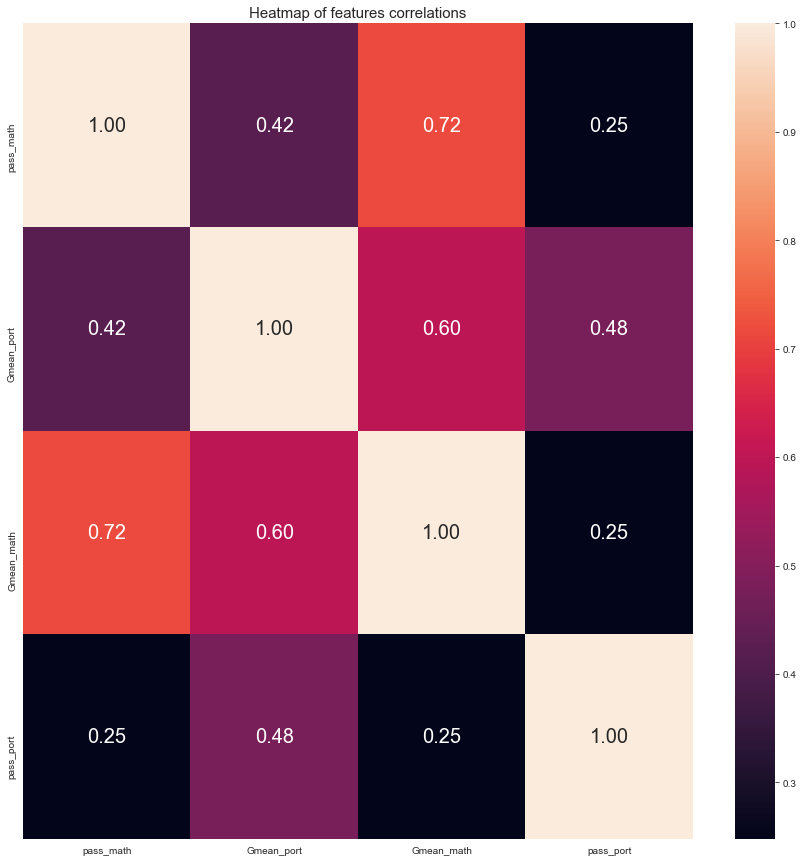

In [8]:
# Check correlation between math and portugese results
corr_var = {'pass_math','pass_port','Gmean_math','Gmean_port'}
fig = plt.figure(figsize=(15,15))

# Plot heatmap
sns.heatmap(data_math_port[corr_var].corr(), annot=True, annot_kws={"size": 20}, fmt=".2f")
plt.title('Heatmap of features correlations', fontsize = 15)


**Takeaways:**
- There is a positive correlation between the Math average grade and Port average grade. The more math average grade is high, higher may be the port grade (0.58)
- Passing Math classes is not that much correlated to passing Port classes (0.24)

**Intuitively, we could say there is a causality between Math grades and Portugese grades (mean). 
I feel confident to focus on the Portugese data set, as it is more consistent and will lead to more interpretable results**

# Exploratory Data Analysis

### Add a flag to mention if the student studies math along with protugese



In [9]:
# Get the info if student has a math grade
data_port = pd.merge(data_port,
                      data_math[['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet','flag_math']],
                      left_on = ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet'],
                      right_on= ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet'],
                      how='left',
                      suffixes=('', '_y')
                     )

# Remove duplicated columns
data_port.drop(data_port.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

# replace null values flag_math as 0 as 
data_port = data_port.fillna(0)

# print info
print("shape of data: {}".format(data_port.shape))
print(10*"*")
print(data_port.groupby('flag_math').size())

data_port.head()

shape of data: (657, 37)
**********
flag_math
0.0    275
1.0    382
dtype: int64


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1_port,G2_port,G3_port,Gmean_port,flag_port,pass_port,flag_math
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,5.5,1,1,1.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,10.0,1,1,1.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,12.5,1,1,1.0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,14.0,1,1,1.0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,12.0,1,1,1.0


### Bar plot to check repartition within qualitative variables

**Comments on occurences per modalities in the qualitative variables:**
Modalities are a bit unbalanced. 

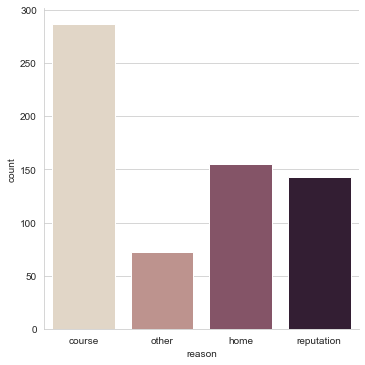

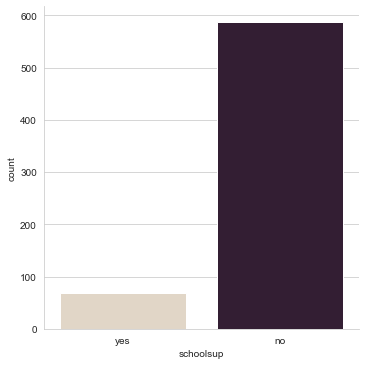

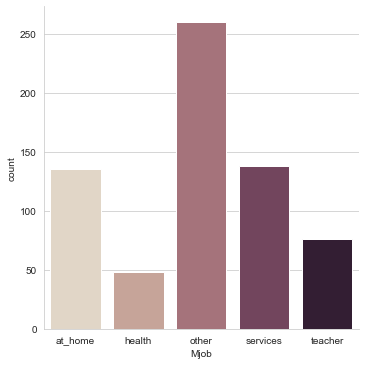

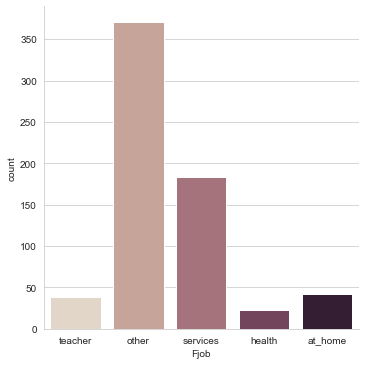

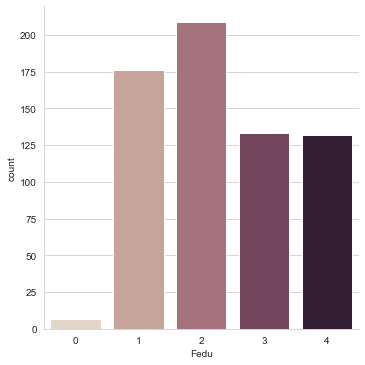

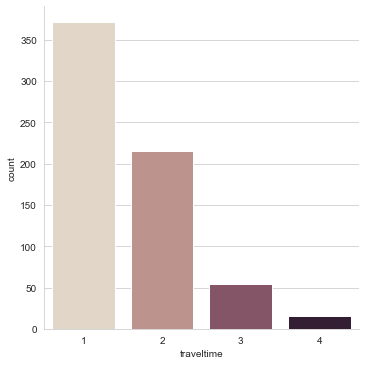

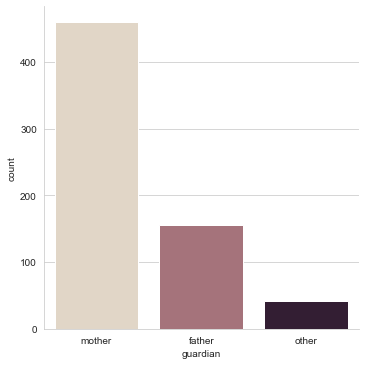

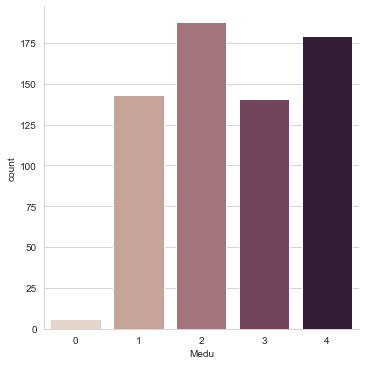

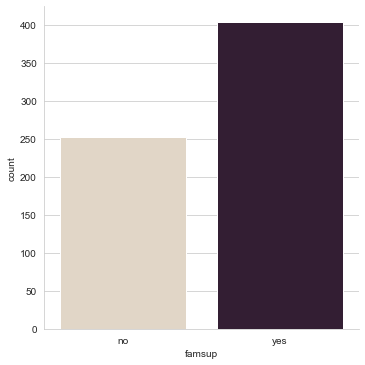

In [10]:
#plot volumes of occurences of qualitative variables

qualitative_var = {'Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime','schoolsup','famsup'}

for i,var in enumerate(qualitative_var):
    
    sns.catplot(x=var, kind="count", palette="ch:.25", data=data_port)


### Bar plot to check repartition within qualitative variables

**Comments on occurences per modalities in the qualitative variables:**

**We check the mean of the "passing" value (GM3 >= 10) from different perpectives (ie. attributes) to see if we can get an _intuition_ on the reason why a student will pass or not his exam**
- Students who pass Portugese exam seems to have a lower **travel time**
- Students looked after by their fathers are more represented among the students who pass the exam
- Choosing a uni based on its **Reputation** seems to play a role in students' performances.
- All students whom mothers' education is none passed their exam. CAREFUL : only 6 students are involved (same obsveration for "Fedu")
- Students who study more are more likely to pass

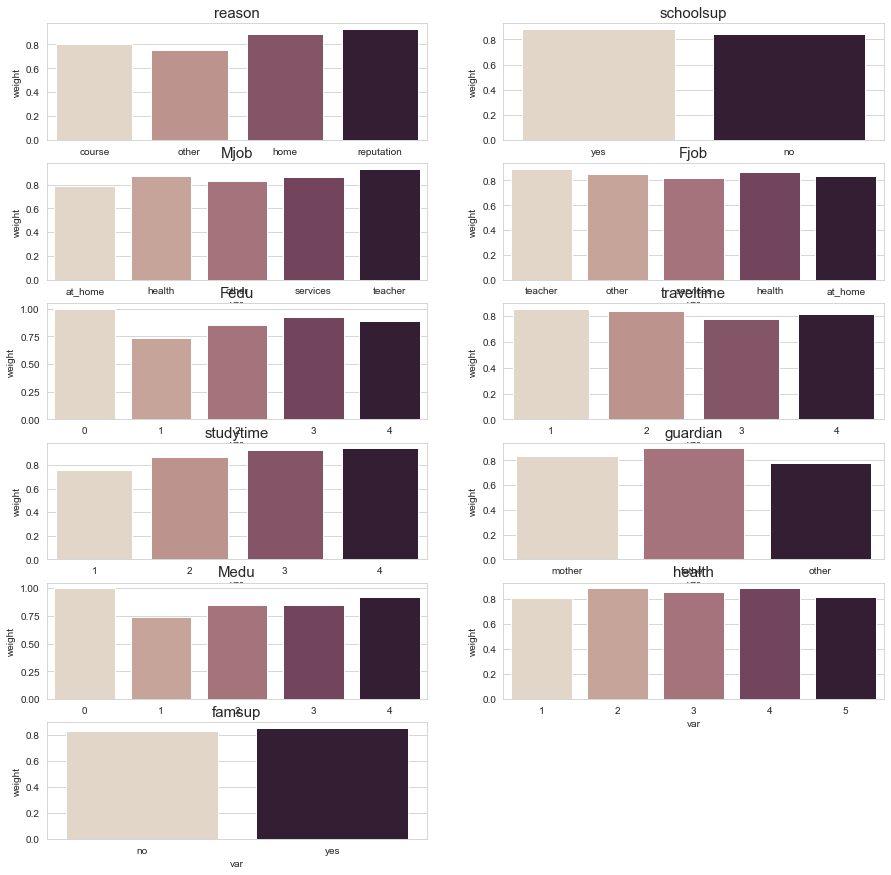

In [11]:
# Plot the mean of "embauche" among different variables. We check if results are similar from a modality to another

qualitative_var = {'Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime','schoolsup','famsup','health','studytime'}
fig = plt.figure(figsize=(15,15))

# iterate over variables
for i,var in enumerate(qualitative_var):
    lsts = {}
    
    # iterate over variable's modalities
    for c in (data_port[var].dropna(axis=0).unique()):
        m = data_port[data_port[var] == c]['pass_port'].mean()
        lsts[c] = m
        data_weighted = pd.DataFrame(lsts.items(),columns=['var', 'weight'])
    
    # plot
    plt.subplot(6, 2, i+1)
    sns.barplot(x="var", y="weight", data=data_weighted, palette="ch:.25")
    plt.title(var, fontsize = 15)


### Numerical distributions (split by target)

**Let's take a look to the distribution of absences to check if there is a  descriptive difference between students who passed the exam and the ones who did not.**

It seems that student who passed are more likely not to be away

/Users/pierre-louispatenotre/opt/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pierre-louispatenotre/opt/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/pierre-louispatenotre/opt/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  war

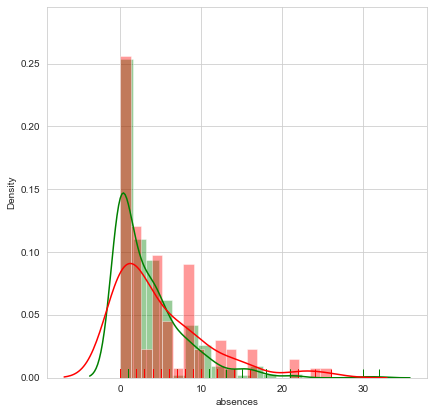

In [12]:
num_NAs_var = {'absences'}

fig = plt.figure(figsize=(15,15))
for i,var in enumerate(num_NAs_var):
    
    plt.subplot(2, 2, i+1)
    sns.distplot(data_port[var].loc[data_port['pass_port']==1], bins=20, kde=True, rug=True, color = "green")
    sns.distplot(data_port[var].loc[data_port['pass_port']==0], bins=20, kde=True, rug=True, color = "red")

### Correlation Analysis
* Let's take a look to the correlation matrix. We look for variables too much correlated with each other or with the target
- We can see that variables are very independent with each other. Target is not correlated with features either
- There are no high correlation between variable and mostly between features and target. We don't need to remove any feature from the dataset


Text(0.5, 1.0, 'Heatmap of features correlations')

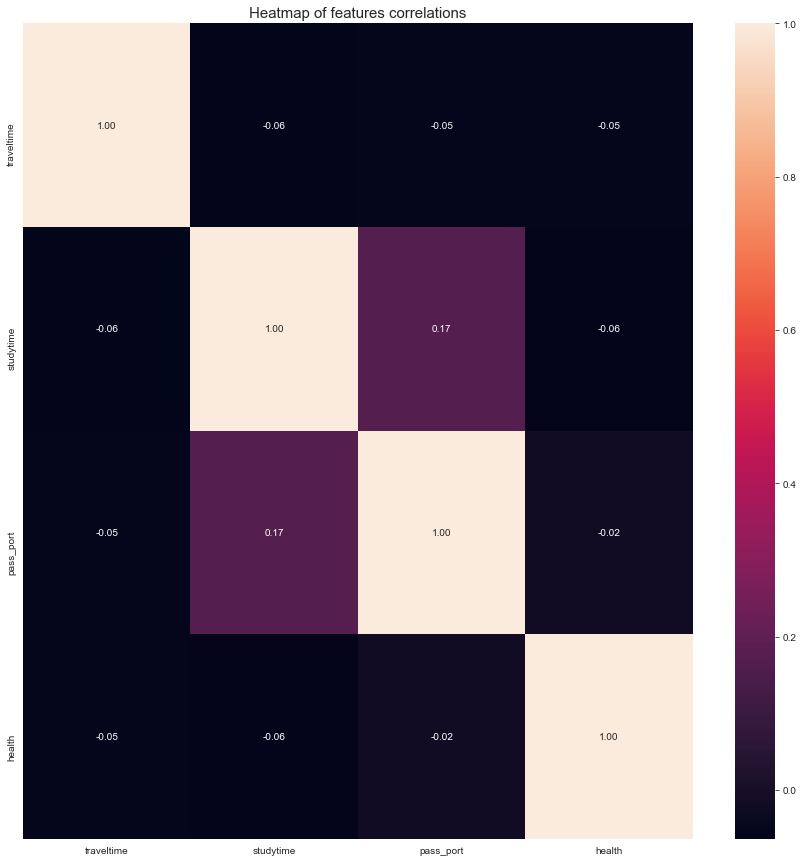

In [13]:
# Observe few variables with eachother
corr_var = {'pass_port','traveltime','schoolsup','famsup','health','studytime'}
fig = plt.figure(figsize=(15,15))

# Plot heatmap
sns.heatmap(data_port[corr_var].corr(), annot=True, annot_kws={"size": 10}, fmt=".2f")
plt.title('Heatmap of features correlations', fontsize = 15)

### Correlation Analysis
* There are not that much information to be drawn from this visualisation
* We have an intuition about the impact of absences and a correlation between the success in mathematics and the success of portugese
* **We will focus on the PORT dataset based on the previous point. Beside, the dataset is more consistent.** 
